In [ ]:
# !nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# !pip install scikit-learn==0.23.2
# per November 20th, 2020

     |████████████████████████████████| 6.8MB 6.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
# !pip install imbalanced-learn==0.7.0
# per November 20th, 2020

     |████████████████████████████████| 174kB 7.1MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# 1) Preparation of Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
lendclub = pd.read_csv("/content/drive/My Drive/Datasets/lendingclub.csv", skipinitialspace= True)
lendclub = lendclub[lendclub['loan_amnt'] < 10001]
lendclub.head()

# GET TO KNOW MORE:
  # verification_status: verification of borrower's source of income
  # dti: monthly debt payment divided by monthly income ratio
  # pub_rec: 
      # Number of derogatory public records; 
      # Public records like judgments, tax liens, or bankruptcies can appear on your credit report as negative items. 
  # revol_bal: 
      # Total credit revolving balance;
      # The portion of a balance that goes unpaid at the end of the billing cycle. This portion is charged interest. 
      # Your credit card balance is an example of a revolving balance.
      # Angka yang menyatakan bahwa sisa billing belum terbayarkan hingga akhir billing cycle. Angka ini akan dikenakan bunga setelah lewat dari billing cycle
  # revol_util:
      # Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
      # Angka yg bisa digunakan oleh borrower untuk kredit.
  # total_acc:
      # The total Number of credit lines currently in the borrower's credit file
      # A credit line is the amount of money that can be charged to a credit card account.
  # initial_list_status:
      # The initial listing status of the loan. Possible values are W, F.
      # A fractional funded P2P loan is defined as multiple investors lending to one borrower to reach the designated loan amount. -pmifunds.com
      # A whole funded loan occurs when one investor funds the whole (100%) amount of the loan.
  # mort_acc:
      # Number of mortgage accounts.
  # pub_rec_bankruptcies
      # Number of public record bankruptcies

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
10,10000.0,36 months,13.11,337.47,B,B4,Sodexo,2 years,RENT,95000.0,Verified,Jun-2013,Fully Paid,debt_consolidation,Debt Consolidation,12.04,Dec-1990,5.0,1.0,4702.0,64.4,26.0,f,INDIVIDUAL,4.0,1.0,"40245 Cody Drives\nBartlettfort, NM 00813"
12,7500.0,36 months,9.17,239.10,B,B2,Social Work/Care Manager,7 years,OWN,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,28.21,Apr-1995,13.0,0.0,17838.0,54.9,35.0,w,JOINT,4.0,0.0,"4173 David Extension\nWest Beckyfort, MS 70466"


In [ ]:
print(f"This dataset has {lendclub.shape[1]} columns and {lendclub.shape[0]} rows.")

This dataset has 27 columns and 164337 rows.


In [ ]:
lendclub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164337 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             164337 non-null  float64
 1   term                  164337 non-null  object 
 2   int_rate              164337 non-null  float64
 3   installment           164337 non-null  float64
 4   grade                 164337 non-null  object 
 5   sub_grade             164337 non-null  object 
 6   emp_title             151842 non-null  object 
 7   emp_length            153751 non-null  object 
 8   home_ownership        164337 non-null  object 
 9   annual_inc            164337 non-null  float64
 10  verification_status   164337 non-null  object 
 11  issue_d               164337 non-null  object 
 12  loan_status           164337 non-null  object 
 13  purpose               164337 non-null  object 
 14  title                 163659 non-null  object 
 15  

#2) Explaination of Each Column

In [ ]:
# Data Dictionary provided by LendingClub.com
lendclub_desc = pd.read_excel('https://resources.lendingclub.com/LCDataDictionary.xlsx')
lendclub_desc.dropna(axis = 0, inplace = True)
lendclub_desc = lendclub_desc.applymap(lambda x: x.strip())
lendclub_desc.set_index("LoanStatNew", inplace = True)

# dictionary type contains key-value pair about column and its descpription
desc = lendclub_desc['Description'].to_dict()

# in dataset there's 'address', meanwhile in the Data Dictionary there's 'addr_state'. They have a same meaning.
desc['address'] = desc.pop('addr_state')    

In [ ]:
descr_data = []
for name in lendclub.columns:
  descr_data.append(
      [
       name,
       lendclub[name].dtypes,
       lendclub[name].isnull().sum(),
       round(lendclub[name].isnull().sum()/len(lendclub)*100, 2),
       lendclub[name].nunique(),
       lendclub[name].unique(),
       desc[name]
       ]
  )

column_desc = pd.DataFrame(descr_data, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])

In [ ]:
column_desc
# lendclub_column_desc.style.set_properties(subset=['Description'], **{'width': '300px'})

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,loan_amnt,float64,0,0.00,368,"[10000.0, 8000.0, 7200.0, 7500.0, 9200.0, 7350...",The listed amount of the loan applied for by t...
1,term,object,0,0.00,2,"[36 months, 60 months]",The number of payments on the loan. Values are...
2,int_rate,float64,0,0.00,524,"[11.44, 11.99, 6.49, 13.11, 9.17, 6.62, 6.99, ...",Interest Rate on the loan
3,installment,float64,0,0.00,19765,"[329.48, 265.68, 220.65, 337.47, 239.1, 282.48...",The monthly payment owed by the borrower if th...
4,grade,object,0,0.00,7,"[B, A, D, C, E, F, G]",LC assigned loan grade
5,sub_grade,object,0,0.00,35,"[B4, B5, A2, B2, A3, D1, C2, C1, A1, C5, B3, D...",LC assigned loan subgrade
6,emp_title,object,12495,7.60,83297,"[Marketing, Credit analyst , Client Advocate, ...",The job title supplied by the Borrower when ap...
7,emp_length,object,10586,6.44,11,"[10+ years, 4 years, 6 years, 2 years, 7 years...",Employment length in years. Possible values ar...
8,home_ownership,object,0,0.00,6,"[RENT, MORTGAGE, OWN, OTHER, NONE, ANY]",The home ownership status provided by the borr...
9,annual_inc,float64,0,0.00,13588,"[117000.0, 65000.0, 54000.0, 95000.0, 55000.0,...",The self-reported annual income provided by th...


In [ ]:
!pip install sidetable
import sidetable

## -- intermezzo: imagine to drop all rows which have null values

In [ ]:
# # BEFORE DROPNA
# lendclub.stb.freq(['loan_status'], cum_cols = False)

In [ ]:
# lendclub.dropna(inplace = True)

In [ ]:
# # AFTER DROPNA
# lendclub.stb.freq(['loan_status'], cum_cols = False)

#3) Handling Missing Value
- emp_title
- emp_length
- title
- revol_util
- mort_acc
- pub_rec_bankruptcies

## emp_title


In [ ]:
lendclub['emp_title'].nunique()

# there are 173105 job title in this data

83297

In [ ]:
lendclub['emp_title'].value_counts()

Teacher                                1679
Manager                                1491
Supervisor                              727
Sales                                   622
Driver                                  594
                                       ... 
Kalahari Resorts                          1
Davis Ulmer Sprinkler Co                  1
Electrician / Foreman                     1
Wilmington Trust Company; M&T Bank        1
Panera, LLC.                              1
Name: emp_title, Length: 83297, dtype: int64

In [ ]:
# Realistically there are too many unique job titles to try to convert this to a dummy variable feature.
# If we do recategorize or encode this, it'd be so many for ML
# Let's remove that emp_title column.

lendclub.drop('emp_title', axis = 1, inplace = True)
lendclub.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
10,10000.0,36 months,13.11,337.47,B,B4,2 years,RENT,95000.0,Verified,Jun-2013,Fully Paid,debt_consolidation,Debt Consolidation,12.04,Dec-1990,5.0,1.0,4702.0,64.4,26.0,f,INDIVIDUAL,4.0,1.0,"40245 Cody Drives\nBartlettfort, NM 00813"
12,7500.0,36 months,9.17,239.10,B,B2,7 years,OWN,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,28.21,Apr-1995,13.0,0.0,17838.0,54.9,35.0,w,JOINT,4.0,0.0,"4173 David Extension\nWest Beckyfort, MS 70466"


## emp_length

In [ ]:
lendclub.stb.freq(['emp_length'], cum_cols = False)

# based on the table below, the most frequent employee's length is '10+ years',
# let's impute the missing value with '10+ years'

,emp_length,count,percent
0,10+ years,44827,29.155583
1,2 years,16055,10.442209
2,< 1 year,14799,9.625303
3,3 years,14037,9.129697
4,1 year,12030,7.824339
5,5 years,11393,7.410033
6,4 years,10377,6.749224
7,6 years,8732,5.679313
8,7 years,8207,5.337851
9,8 years,7435,4.835741


In [ ]:
lendclub['emp_length'].describe()

count        153751
unique           11
top       10+ years
freq          44827
Name: emp_length, dtype: object

In [ ]:
from sklearn.impute import SimpleImputer
imputer_most = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [ ]:
print(f"There are {lendclub['emp_length'].isnull().sum()} null value in 'emp_length' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

lendclub['emp_length'] = imputer_most.fit_transform(lendclub['emp_length'].values.reshape(-1,1))
print(f"There are {lendclub['emp_length'].isnull().sum()} null value in 'emp_length' column.")

There are 10586 null value in 'emp_length' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'emp_length' column.


## title

In [ ]:
lendclub.stb.freq(['title'], cum_cols = False)

# there's a lot reasons that have same meaning, but python read it's different cause of lower-upper case.
# we could re-categorize it with the correct one,
# before we do that, better to check on 'purpose' column.

,title,count,percent
0,Debt consolidation,53740,32.836569
1,Credit card refinancing,18998,11.608283
2,Other,8302,5.072743
3,Home improvement,6410,3.916680
4,Debt Consolidation,3831,2.340843
...,...,...,...
26566,"""For those that said i couldn't""",1,0.000611
26567,"""Discover"" ing I no longer want to ""Chase"" aft...",1,0.000611
26568,"to pay of my bill,and one 22apr loand",1,0.000611
26569,\tdebt_consolidation,1,0.000611


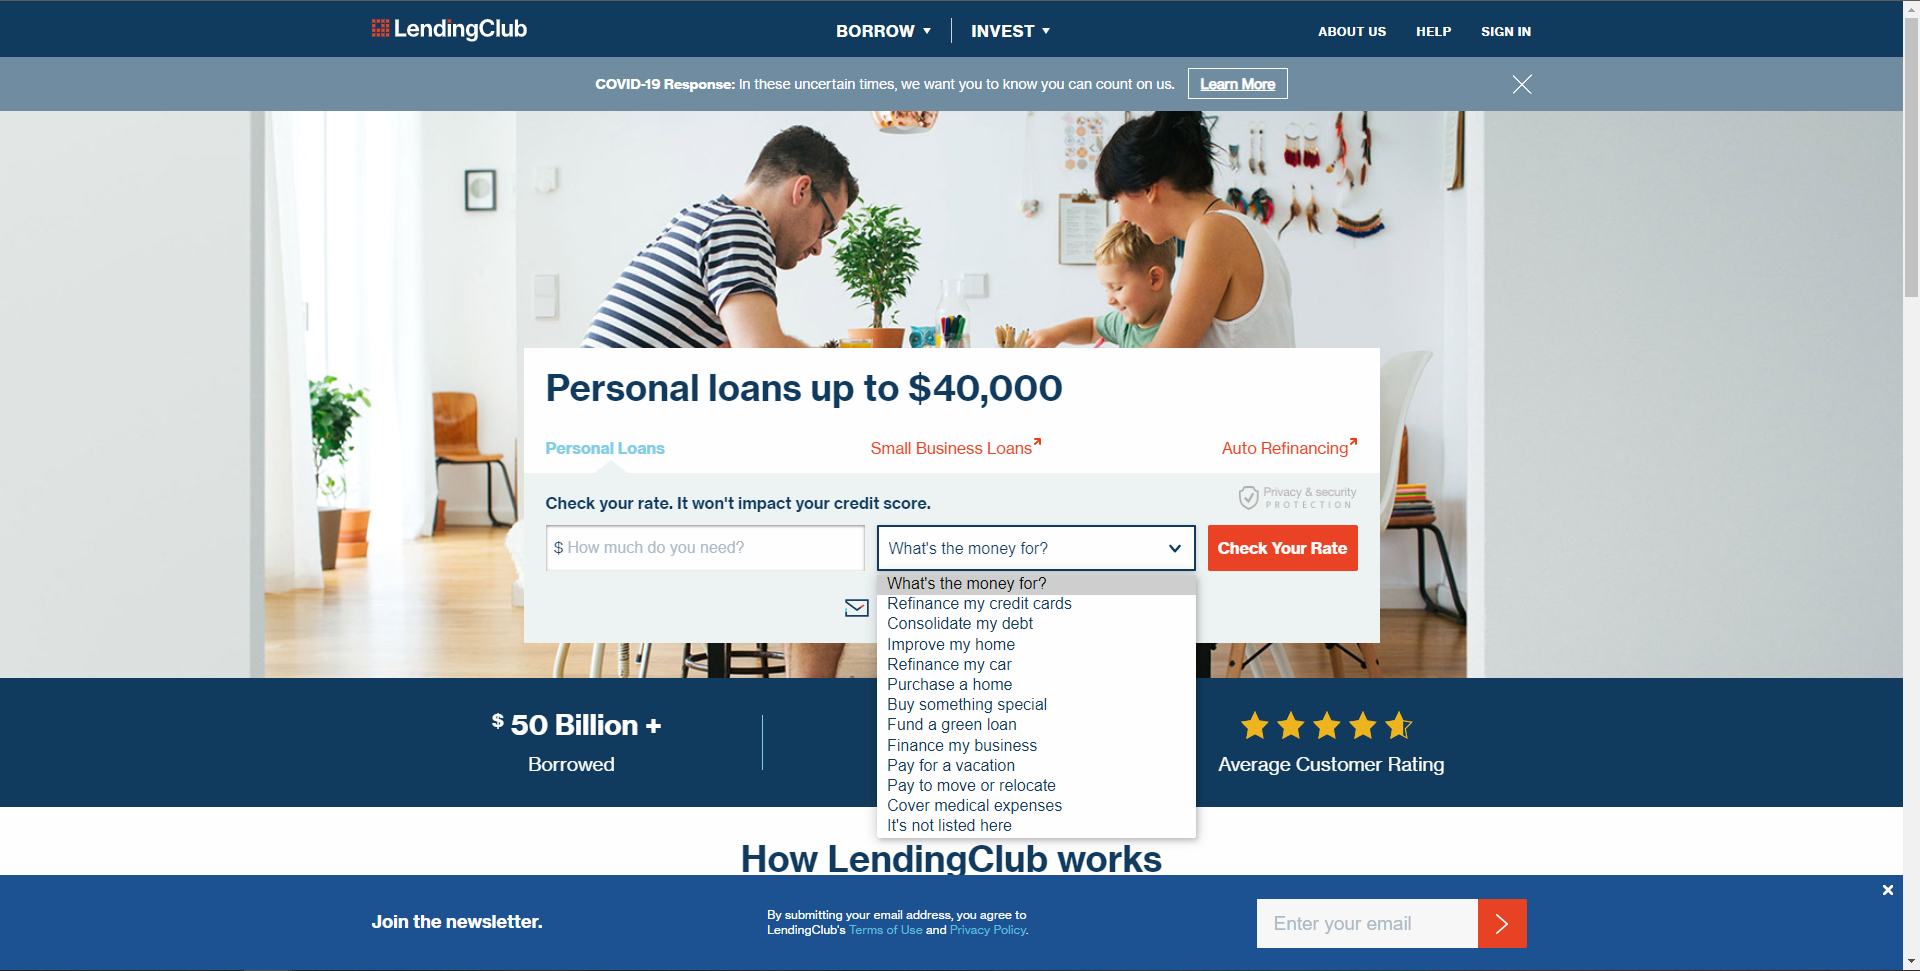



Disclaimer: This dataset was scraped in 2018, but the picture above was captured in 2020. So it may be slightly different with the terms in the options. The picture above is only for illustration.

In [ ]:
lendclub.stb.freq(['purpose'], cum_cols = False)

# 'title' is very similar with purpose.
# 'title' looks like written by user, and identified by the case of character.
# Since that, we gonna drop 'title' and keep the 'purpose'.
# because 'purpose' is the list of category from "What's the money for?" that borrower choose from the beginning,
# besides the "How much do you need?" column.

,purpose,count,percent
0,debt_consolidation,85754,52.181797
1,credit_card,32468,19.756963
2,other,14241,8.665730
3,home_improvement,10919,6.644274
4,major_purchase,5447,3.314531
5,car,3577,2.176625
6,medical,2940,1.789007
7,small_business,2235,1.360010
8,moving,2217,1.349057
9,vacation,2127,1.294292


In [ ]:
lendclub.drop('title', axis = 1, inplace = True)
lendclub.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
10,10000.0,36 months,13.11,337.47,B,B4,2 years,RENT,95000.0,Verified,Jun-2013,Fully Paid,debt_consolidation,12.04,Dec-1990,5.0,1.0,4702.0,64.4,26.0,f,INDIVIDUAL,4.0,1.0,"40245 Cody Drives\nBartlettfort, NM 00813"
12,7500.0,36 months,9.17,239.10,B,B2,7 years,OWN,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,28.21,Apr-1995,13.0,0.0,17838.0,54.9,35.0,w,JOINT,4.0,0.0,"4173 David Extension\nWest Beckyfort, MS 70466"


## revol_util

In [ ]:
lendclub.stb.freq(['revol_util'], cum_cols = False)

,revol_util,count,percent
0,0.00,1242,0.756547
1,55.00,313,0.190660
2,47.00,313,0.190660
3,60.00,311,0.189441
4,61.00,310,0.188832
...,...,...,...
1136,0.54,1,0.000609
1137,0.49,1,0.000609
1138,0.16,1,0.000609
1139,0.05,1,0.000609


In [ ]:
lendclub['revol_util'].describe()

# let's impute the missing value with mean value

count    164167.000000
mean         51.096413
std          25.304787
min           0.000000
25%          31.900000
50%          51.300000
75%          70.800000
max         892.300000
Name: revol_util, dtype: float64

In [ ]:
imputer_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [ ]:
print(f"There are {lendclub['revol_util'].isnull().sum()} null value in 'revol_util' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

lendclub['revol_util'] = imputer_mean.fit_transform(lendclub['revol_util'].values.reshape(-1,1))
print(f"There are {lendclub['revol_util'].isnull().sum()} null value in 'revol_util' column.")

There are 170 null value in 'revol_util' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'revol_util' column.


## mort_acc

In [ ]:
lendclub.stb.freq(['mort_acc'], cum_cols = False)

,mort_acc,count,percent
0,0.0,70146,48.899268
1,1.0,23556,16.421053
2,2.0,17487,12.190310
3,3.0,12352,8.610666
4,4.0,8437,5.881492
5,5.0,5131,3.576856
6,6.0,3018,2.103869
7,7.0,1636,1.140467
8,8.0,779,0.543046
9,9.0,396,0.276054


In [ ]:
lendclub['mort_acc'].describe()

# because 'mort_acc' have an integer value, we will impute missing value with median value: '1'.


count    143450.000000
mean          1.397128
std           1.931071
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          31.000000
Name: mort_acc, dtype: float64

In [ ]:
imputer_median = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [ ]:
print(f"There are {lendclub['mort_acc'].isnull().sum()} null value in 'mort_acc' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

lendclub['mort_acc'] = imputer_median.fit_transform(lendclub['mort_acc'].values.reshape(-1,1))
print(f"There are {lendclub['mort_acc'].isnull().sum()} null value in 'mort_acc' column.")

There are 20887 null value in 'mort_acc' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'mort_acc' column.


##pub_rec_bankruptcies

In [ ]:
lendclub.stb.freq(['pub_rec_bankruptcies'], cum_cols = False)

,pub_rec_bankruptcies,count,percent
0,0.0,139795,85.247091
1,1.0,22884,13.954680
2,2.0,1044,0.636632
3,3.0,197,0.120131
4,4.0,43,0.026221
5,5.0,17,0.010367
6,6.0,5,0.003049
7,7.0,2,0.001220
8,8.0,1,0.000610


In [ ]:
lendclub['pub_rec_bankruptcies'].describe()

# we see that the value either mean, Q1, Q2 (median), or Q3 is '0'. 
# so we impute the missing value with '0'.

count    163988.000000
mean          0.157768
std           0.399758
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64

In [ ]:
print(f"There are {lendclub['pub_rec_bankruptcies'].isnull().sum()} null value in 'pub_rec_bankruptcies' column.")
print('='*15, " ++ Imputing ++ ", "="*15)

lendclub['pub_rec_bankruptcies'] = imputer_median.fit_transform(lendclub['pub_rec_bankruptcies'].values.reshape(-1,1))
print(f"There are {lendclub['pub_rec_bankruptcies'].isnull().sum()} null value in 'pub_rec_bankruptcies' column.")

There are 349 null value in 'pub_rec_bankruptcies' column.
===============  ++ Imputing ++  ===============
There are 0 null value in 'pub_rec_bankruptcies' column.


# 4) Datetime Extraction
Remember: both 'earliest_cr_line' and 'issue_d' have month and year only. So it'd be wise if we extract month and year only.

## loan_status

In [ ]:
lendclub['loan_status'].value_counts()

Fully Paid     136690
Charged Off     27647
Name: loan_status, dtype: int64

In [ ]:
lendclub['loan_status'] = lendclub['loan_status'].map({
    'Fully Paid' : 1,
    'Charged Off' : 0
})

In [ ]:
lendclub.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,1,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,1,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,1,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
10,10000.0,36 months,13.11,337.47,B,B4,2 years,RENT,95000.0,Verified,Jun-2013,1,debt_consolidation,12.04,Dec-1990,5.0,1.0,4702.0,64.4,26.0,f,INDIVIDUAL,4.0,1.0,"40245 Cody Drives\nBartlettfort, NM 00813"
12,7500.0,36 months,9.17,239.10,B,B2,7 years,OWN,55000.0,Not Verified,Dec-2015,1,debt_consolidation,28.21,Apr-1995,13.0,0.0,17838.0,54.9,35.0,w,JOINT,4.0,0.0,"4173 David Extension\nWest Beckyfort, MS 70466"


# 4) Setup the Pipeline

## Splitting Data into Features and Target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting
X = lendclub.drop('loan_status', axis = 1)
y = lendclub['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 88,
                                                    stratify = y)

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [ ]:
cols_cat = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status',
       'application_type','issue_d', 'earliest_cr_line']

cols_num = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies']

In [ ]:
pipe_num = Pipeline([
                     ('scaler', RobustScaler())
])

pipe_cat = Pipeline([
                     ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

pipe_prep = ColumnTransformer([
                               ('categoric', pipe_cat, cols_cat),
                               ('numeric', pipe_num, cols_num)
])

In [ ]:
X_train.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
225019,8000.0,36 months,13.67,272.15,B,B5,1 year,MORTGAGE,70000.0,Not Verified,Dec-2013,home_improvement,11.57,Sep-1995,11.0,1.0,4006.0,33.7,34.0,w,INDIVIDUAL,1.0,1.0,Unit 0261 Box 9935\nDPO AA 48052
395494,10000.0,36 months,12.99,336.90,B,B4,10+ years,MORTGAGE,137761.0,Verified,Oct-2013,home_improvement,12.34,Dec-1994,11.0,0.0,53088.0,46.3,56.0,f,INDIVIDUAL,10.0,0.0,"0658 Matthew Fort Suite 251\nWest Tamarafurt, ..."


In [ ]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
X_train.shape

(131469, 24)

# 5) Machine Learning Modelling

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

## Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
pipe_lr = Pipeline([
                    ('preps', pipe_prep),
                    ('balancing', SMOTE()),
                    ('algo', lr)
])

In [ ]:
pipe_lr.fit(X_train, y_train)

In [ ]:
pred_lr = pipe_lr.predict(X_test)

In [ ]:
lr_cm = confusion_matrix(y_test, pred_lr, labels = [1,0] )
lr_cm_df = pd.DataFrame(data = lr_cm,  
                        columns = ['Prediction 1', 'Prediction 0'],
                        index = ['Actual 1', 'Actual 0'])

sns.heatmap(lr_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
lr_cm_df

In [ ]:
print(classification_report(y_test, pred_lr))

In [ ]:
prec_lr = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_lr)}, 
                       index = ['Logistic Regression'])

tp_lr = lr_cm_df['Prediction 1'][0]
fp_lr = lr_cm_df['Prediction 1'][1]
fn_lr = lr_cm_df['Prediction 0'][0]
tn_lr = lr_cm_df['Prediction 0'][1]

## Support Vector Machine

In [ ]:
sv = SVC(max_iter = 2000)

In [ ]:
pipe_sv = Pipeline([
                    ('preps', pipe_prep),
                    ('balancing', SMOTE()),
                    ('algo', sv)
])

In [ ]:
pipe_sv.fit(X_train, y_train)

In [ ]:
pred_sv = pipe_sv.predict(X_test)

In [ ]:
sv_cm = confusion_matrix(y_test, pred_sv, labels = [1,0] )
sv_cm_df = pd.DataFrame(data = sv_cm,  
                        columns = ['Prediction 1', 'Prediction 0'],
                        index = ['Actual 1', 'Actual 0'])

sns.heatmap(sv_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
sv_cm_df

In [ ]:
print(classification_report(y_test, pred_sv))

In [ ]:
prec_sv = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_sv)}, 
                       index = ['SVC'])


tp_sv = sv_cm_df['Prediction 1'][0]
fp_sv = sv_cm_df['Prediction 1'][1]
fn_sv = sv_cm_df['Prediction 0'][0]
tn_sv = sv_cm_df['Prediction 0'][1]

## K-Nearest Neighbor

In [ ]:
kn = KNeighborsClassifier()

In [ ]:
pipe_kn = Pipeline([
                    ('preps', pipe_prep),
                    ('balancing', SMOTE()),
                    ('algo', kn)
])

In [ ]:
pipe_kn.fit(X_train, y_train)

In [ ]:
pred_kn = pipe_kn.predict(X_test)

In [ ]:
kn_cm = confusion_matrix(y_test, pred_kn, labels = [1,0] )
kn_cm_df = pd.DataFrame(data = kn_cm,  
                        columns = ['Prediction 1', 'Prediction 0'],
                        index = ['Actual 1', 'Actual 0'])

sns.heatmap(kn_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
kn_cm_df

In [ ]:
print(classification_report(y_test, pred_kn))

In [ ]:
prec_kn = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_kn)}, 
                       index = ['K-Nearest Neighbor'])


tp_kn = kn_cm_df['Prediction 1'][0]
fp_kn = kn_cm_df['Prediction 1'][1]
fn_kn = kn_cm_df['Prediction 0'][0]
tn_kn = kn_cm_df['Prediction 0'][1]

## Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
pipe_rf = Pipeline([
                    ('preps', pipe_prep),
                    ('balancing', SMOTE()),
                    ('algo', rf)
])

In [ ]:
pipe_rf.fit(X_train, y_train)

In [ ]:
pred_rf = pipe_rf.predict(X_test)

In [ ]:
rf_cm = confusion_matrix(y_test, pred_rf, labels = [1,0] )
rf_cm_df = pd.DataFrame(data = rf_cm,  
                        columns = ['Prediction 1', 'Prediction 0'],
                        index = ['Actual 1', 'Actual 0'])

sns.heatmap(rf_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
rf_cm_df

In [ ]:
print(classification_report(y_test, pred_rf))

In [ ]:
prec_rf = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_rf)}, 
                       index = ['Random Forest'])


tp_rf = rf_cm_df['Prediction 1'][0]
fp_rf = rf_cm_df['Prediction 1'][1]
fn_rf = rf_cm_df['Prediction 0'][0]
tn_rf = rf_cm_df['Prediction 0'][1]

## Xtreme Gradient Boosting

In [ ]:
xg = GradientBoostingClassifier()

In [ ]:
pipe_xg = Pipeline([
                    ('preps', pipe_prep),
                    ('balancing', SMOTE()),
                    ('algo', xg)
])

In [ ]:
pipe_xg.fit(X_train, y_train)

In [ ]:
pred_xg = pipe_xg.predict(X_test)

In [ ]:
xg_cm = confusion_matrix(y_test, pred_xg, labels = [1,0] )
xg_cm_df = pd.DataFrame(data = xg_cm,  
                        columns = ['Prediction 1', 'Prediction 0'],
                        index = ['Actual 1', 'Actual 0'])

sns.heatmap(xg_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
xg_cm_df

In [ ]:
print(classification_report(y_test, pred_xg))

In [ ]:
prec_xg = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_xg)}, 
                       index = ['XGBoost'])


tp_xg = xg_cm_df['Prediction 1'][0]
fp_xg = xg_cm_df['Prediction 1'][1]
fn_xg = xg_cm_df['Prediction 0'][0]
tn_xg = xg_cm_df['Prediction 0'][1]

# 5) Optimization

## Logistic Regression

In [ ]:
lrt = LogisticRegression()

In [ ]:
pipe_lrt = Pipeline([
                    ('preps', pipe_prep),
                    ('balancing', SMOTE()),
                    ('algo', lrt)
])

In [ ]:
param_lr = {
    'algo__penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
    'algo__C'  : np.logspace(-5,5,20),
    'algo__max_iter' : [100, 500, 1000]
}

In [ ]:
grid_lr = RandomizedSearchCV(
    estimator = pipe_lrt,
    param_distributions = param_lr,
    cv = 4,
    scoring = 'precision',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [ ]:
grid_lr.fit(X_train, y_train)

In [ ]:
grid_lr.best_params_

In [ ]:
tuned_lr = grid_lr.best_estimator_
pred_lrt = tuned_lr.predict(X_test)

In [ ]:
lrt_cm = confusion_matrix(y_test, pred_lrt, labels = [1,0] )
lrt_cm_df = pd.DataFrame(data = lrt_cm,  
                        columns = ['Prediction 1', 'Prediction 0'],
                        index = ['Actual 1', 'Actual 0'])

sns.heatmap(lrt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
lrt_cm_df

In [ ]:
print(classification_report(y_test, pred_lrt))

In [ ]:
prec_lrt = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_lrt)}, 
                       index = ['Tuned Logistic Regression'])


tp_lrt = lrt_cm_df['Prediction 1'][0]
fp_lrt = lrt_cm_df['Prediction 1'][1]
fn_lrt = lrt_cm_df['Prediction 0'][0]
tn_lrt = lrt_cm_df['Prediction 0'][1]

## Support Vector Machine

In [ ]:
svt = SVC()

In [ ]:
pipe_svt = Pipeline([
                    ('preps', pipe_prep),
                    ('balancing', SMOTE()),
                    ('algo', svt)
])

In [ ]:
param_sv = {
    'algo__gamma' : ['scale', 'auto'], 
    'algo__C'  : np.logspace(-4,4,15),
    'algo__max_iter' : np.arange(1000,5001, 500)
}

grid_sv = RandomizedSearchCV(
    estimator = pipe_svt,
    param_distributions = param_sv,
    cv = 4,
    scoring = 'precision',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [ ]:
grid_sv.fit(X_train, y_train)

In [ ]:
grid_sv.best_params_

In [ ]:
tuned_sv = grid_sv.best_estimator_
pred_svt = tuned_sv.predict(X_test)

In [ ]:
svt_cm = confusion_matrix(y_test, pred_svt, labels = [1,0] )
svt_cm_df = pd.DataFrame(data = svt_cm,  
                        columns = ['Prediction 1', 'Prediction 0'],
                        index = ['Actual 1', 'Actual 0'])

sns.heatmap(svt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
svt_cm_df

In [ ]:
print(classification_report(y_test, pred_svt))

In [ ]:
prec_svt = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_svt)}, 
                       index = ['Tuned SVC'])


tp_svt = svt_cm_df['Prediction 1'][0]
fp_svt = svt_cm_df['Prediction 1'][1]
fn_svt = svt_cm_df['Prediction 0'][0]
tn_svt = svt_cm_df['Prediction 0'][1]

## K-Nearest Neighbor

In [ ]:
knt = KNeighborsClassifier()

In [ ]:
pipe_knt = Pipeline([
                    ('preps', pipe_prep),
                    ('balancing', SMOTE()),
                    ('algo', knt)
])

In [ ]:
param_kn = {
    'algo__n_neighbors': [3,5,9,11,19,25], 
    'algo__weights': ['uniform', 'distance'],
    'algo__p': [1,2]
}

grid_kn = RandomizedSearchCV(
    estimator = pipe_knt,
    param_distributions = param_kn,
    cv = 4,
    scoring = 'precision',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [ ]:
grid_kn.fit(X_train, y_train)

In [ ]:
grid_kn.best_params_

In [ ]:
tuned_kn = grid_kn.best_estimator_
pred_knt = tuned_kn.predict(X_test)

In [ ]:
knt_cm = confusion_matrix(y_test, pred_knt, labels = [1,0] )
knt_cm_df = pd.DataFrame(data = knt_cm,  
                        columns = ['Prediction 1', 'Prediction 0'],
                        index = ['Actual 1', 'Actual 0'])

sns.heatmap(knt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
knt_cm_df

In [ ]:
print(classification_report(y_test, pred_knt))

In [ ]:
prec_knt = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_knt)}, 
                       index = ['Tuned K-Nearest Neighbor'])


tp_knt = knt_cm_df['Prediction 1'][0]
fp_knt = knt_cm_df['Prediction 1'][1]
fn_knt = knt_cm_df['Prediction 0'][0]
tn_knt = knt_cm_df['Prediction 0'][1]

## Random Forest

In [ ]:
rft = RandomForestClassifier()

In [ ]:
pipe_rft = Pipeline([
                    ('preps', pipe_prep),
                    ('balancing', SMOTE()),
                    ('algo', rft)
])

In [ ]:
param_rf = {
    "algo__n_estimators" : [10,25,30,50],
    "algo__max_depth" : [1,2,4,5,6],
    "algo__min_samples_leaf" : np.linspace(0.07, 0.2, 30),
}

grid_rf = RandomizedSearchCV(
    estimator = pipe_rft,
    param_distributions = param_rf,
    cv = 4,
    scoring = 'precision',
    refit = True,
    n_jobs = -1,
    verbose = 3
)

In [ ]:
grid_rf.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  9.5min finished


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('preps',
                                              ColumnTransformer(transformers=[('categoric',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['term',
                                                                                'grade',
                                                                                'sub_grade',
                                                                                'emp_length',
                                                                                'home_ownership',
                                                                                'verification_status',
                 

In [ ]:
grid_rf.best_params_

{'algo__max_depth': 6,
 'algo__min_samples_leaf': 0.09241379310344829,
 'algo__n_estimators': 50}

In [ ]:
tuned_rf = grid_rf.best_estimator_
pred_rft = tuned_rf.predict(X_test)

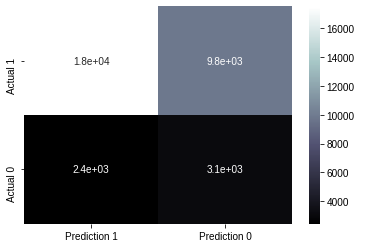

In [ ]:
rft_cm = confusion_matrix(y_test, pred_rft, labels = [1,0] )
rft_cm_df = pd.DataFrame(data = rft_cm,  
                        columns = ['Prediction 1', 'Prediction 0'],
                        index = ['Actual 1', 'Actual 0'])

sns.heatmap(rft_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
rft_cm_df

,Prediction 1,Prediction 0
Actual 1,17537,9801
Actual 0,2418,3112


In [ ]:
print(classification_report(y_test, pred_rft))

              precision    recall  f1-score   support

           0       0.24      0.56      0.34      5530
           1       0.88      0.64      0.74     27338

    accuracy                           0.63     32868
   macro avg       0.56      0.60      0.54     32868
weighted avg       0.77      0.63      0.67     32868



In [ ]:
prec_rft = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_rft)}, 
                       index = ['Tuned Random Forest'])


tp_rft = rft_cm_df['Prediction 1'][0]
fp_rft = rft_cm_df['Prediction 1'][1]
fn_rft = rft_cm_df['Prediction 0'][0]
tn_rft = rft_cm_df['Prediction 0'][1]

## Xtreme Gradient Boosting

In [ ]:
xgt = GradientBoostingClassifier()

In [ ]:
pipe_xgt = Pipeline([
                    ('preps', pipe_prep),
                    ('balancing', SMOTE()),
                    ('algo', xgt)
])

In [ ]:
param_xg = {
    "algo__n_estimators" : [10, 20, 25, 30, 50, 100],
    "algo__learning_rate" : np.linspace(0.08, 4, 20),
    "algo__subsample" : [0.1, 0.5, 1, 4, 7]
}

grid_xg = RandomizedSearchCV(
    estimator = pipe_xgt,
    param_distributions = param_xg,
    cv = 4,
    scoring = 'precision',
    refit = True,
    n_jobs = -1,
    verbose = 3,
    n_iter = 100
)

In [ ]:
grid_xg.fit(X_train, y_train)

In [ ]:
grid_xg.best_params_

In [ ]:
tuned_xg = grid_xg.best_estimator_
pred_xgt = tuned_xg.predict(X_test)

In [ ]:
xgt_cm = confusion_matrix(y_test, pred_xgt, labels = [1,0] )
xgt_cm_df = pd.DataFrame(data = xgt_cm,  
                        columns = ['Prediction 1', 'Prediction 0'],
                        index = ['Actual 1', 'Actual 0'])

sns.heatmap(xgt_cm_df, annot = True, cmap = 'bone')
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
xgt_cm_df

In [ ]:
print(classification_report(y_test, pred_xgt))

In [ ]:
prec_xgt = pd.DataFrame({"Precision Score" : precision_score(y_test, pred_xgt)}, 
                       index = ['Tuned XGBoost'])


tp_xgt = xgt_cm_df['Prediction 1'][0]
fp_xgt = xgt_cm_df['Prediction 1'][1]
fn_xgt = xgt_cm_df['Prediction 0'][0]
tn_xgt = xgt_cm_df['Prediction 0'][1]

## Model Summary

In [ ]:
model_summary = pd.concat([prec_lr, prec_lrt, prec_sv, prec_svt, prec_kn, prec_knt, 
                           prec_rf, prec_rft, prec_xg, prec_xgt])
model_summary

In [ ]:
summary_cm = pd.DataFrame({
    "TruePositive" : [tp_lr, tp_lrt, tp_sv, tp_svt, tp_kn, tp_knt, tp_rf, tp_rft, tp_xg, tp_xgt],
    "TrueNegative" : [tn_lr, tn_lrt, tn_sv, tn_svt, tn_kn, tn_knt, tn_rf, tn_rft, tn_xg, tn_xgt],
    "FalsePositive": [fp_lr, fp_lrt, fp_sv, fp_svt, fp_kn, fp_knt, fp_rf, fp_rft, fp_xg, fp_xgt],
    "FalseNegative": [fn_lr, fn_lrt, fn_sv, fn_svt, fn_kn, fn_knt, fn_rf, fn_rft, fn_xg, fn_xgt]
}, 
index = model_summary.index)

summary_cm

## Export Model

In [ ]:
import joblib
import pickle

In [ ]:
pickle.dump(tuned_rf, 'lc_piperfpickle')

In [ ]:
joblib.dump(tuned_rf, 'lc_piperf')

['lc_piperf']

In [ ]:
joblib.dump(tuned_kn, 'lc_pipekn')

In [ ]:
model = joblib.load('lc_piperf')

In [ ]:
model.predict_proba(X_test)

array([[0.49037413, 0.50962587],
       [0.5225797 , 0.4774203 ],
       [0.5048101 , 0.4951899 ],
       ...,
       [0.50236547, 0.49763453],
       [0.49335466, 0.50664534],
       [0.51654487, 0.48345513]])

In [ ]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
desc

{'acc_now_delinq': 'The number of accounts on which the borrower is now delinquent.',
 'acc_open_past_24mths': 'Number of trades opened in past 24 months.',
 'address': 'The state provided by the borrower in the loan application',
 'all_util': 'Balance to credit limit on all trades',
 'annual_inc': 'The self-reported annual income provided by the borrower during registration.',
 'annual_inc_joint': 'The combined self-reported annual income provided by the co-borrowers during registration',
 'application_type': 'Indicates whether the loan is an individual application or a joint application with two co-borrowers',
 'avg_cur_bal': 'Average current balance of all accounts',
 'bc_open_to_buy': 'Total open to buy on revolving bankcards.',
 'bc_util': 'Ratio of total current balance to high credit/credit limit for all bankcard accounts.',
 'chargeoff_within_12_mths': 'Number of charge-offs within 12 months',
 'collection_recovery_fee': 'post charge off collection fee',
 'collections_12_mths_e

In [ ]:
round(123412.12341234, 2)

123412.12

In [ ]:
tuned_rf.predict_proba(X_test)[0][0]

0.49911004464871445

In [ ]:
lendclub.iloc[888]

loan_amnt                                                     8800
term                                                     36 months
int_rate                                                     12.99
installment                                                 296.47
grade                                                            C
sub_grade                                                       C2
emp_length                                                < 1 year
home_ownership                                                 OWN
annual_inc                                                   48200
verification_status                                   Not Verified
issue_d                                                   Jan-2015
loan_status                                                      1
purpose                                                credit_card
dti                                                          24.68
earliest_cr_line                                          Aug-

In [ ]:
import plotly.graph_objs as go

In [ ]:
go.Histogram(
    x = lendclub['loan_status'],
    y = lendclub['int_rate'],
)

Histogram({
    'x': array([1, 1, 1, ..., 1, 1, 1]), 'y': array([11.44, 11.99,  6.49, ..., 10.99,  9.99, 13.61])
})